In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [7]:
df=pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
X=df.drop(columns=['math_score'],axis=1)

In [9]:
y=df['math_score']

In [10]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [11]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [12]:
print('categorical in "gender" variable:',end=" ")
print(df['gender'].unique())

print('categorical in "race_ethnicity" variable:',end=" ")
print(df['race_ethnicity'].unique())

print('categorical in "parental_level_of_education" variable:',end=" ")
print(df['parental_level_of_education'].unique())

print('categorical in "lunch" variable:',end=" ")
print(df['lunch'].unique())

print('categorical in "test_preparation_course" variable:',end=" ")
print(df['test_preparation_course'].unique())

categorical in "gender" variable: ['female' 'male']
categorical in "race_ethnicity" variable: ['group B' 'group C' 'group A' 'group D' 'group E']
categorical in "parental_level_of_education" variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categorical in "lunch" variable: ['standard' 'free/reduced']
categorical in "test_preparation_course" variable: ['none' 'completed']


In [15]:
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

sc=StandardScaler()
ohe=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ('OneHOtEncoder',ohe,cat_features),
        ('StandardScaler',sc,num_features)
    ]
)

In [16]:
X=preprocessor.fit_transform(X)

In [17]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
X_train.shape,X_test.shape


((800, 19), (200, 19))

In [19]:
def evalute_model(true, predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_scr=r2_score(true,predicted)
    return mae,mse,rmse,r2_scr

In [20]:
models={
    'Linear Regression': LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'K-Neighbhours regressor':KNeighborsRegressor(),
    'decision tree':DecisionTreeRegressor(),
    'random forest regressor': RandomForestRegressor(),
    'xgregressor':XGBRegressor(),
    'catboosting regressor': CatBoostRegressor(verbose=False),
    'AdaBoostRegressor': AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)


    model_train_mae,model_train_mse,model_train_rmse,model_train_r2=evalute_model(y_train,y_train_pred)

    model_test_mae,model_test_mse,model_test_rmse,model_test_r2=evalute_model(y_test,y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('model performance for training')
    print("--mae:{:.4f}".format(model_train_rmse))
    print("--mse:{:.4f}".format(model_train_mse))
    print("--r2 score: {:.4f}".format(model_train_r2))

    print('----------------------------------------')

    print('model performance for testing')
    print("--mae:{:.4f}".format(model_test_rmse))
    print("--mse:{:.4f}".format(model_test_mse))
    print("--r2 score: {:.4f}".format(model_test_r2))


    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')




Linear Regression
model performance for training
--mae:5.3274
--mse:28.3810
--r2 score: 0.8741
----------------------------------------
model performance for testing
--mae:5.4096
--mse:29.2638
--r2 score: 0.8797


Lasso
model performance for training
--mae:6.5938
--mse:43.4784
--r2 score: 0.8071
----------------------------------------
model performance for testing
--mae:6.5197
--mse:42.5064
--r2 score: 0.8253


Ridge
model performance for training
--mae:5.3233
--mse:28.3378
--r2 score: 0.8743
----------------------------------------
model performance for testing
--mae:5.3904
--mse:29.0563
--r2 score: 0.8806


K-Neighbhours regressor
model performance for training
--mae:5.7122
--mse:32.6294
--r2 score: 0.8553
----------------------------------------
model performance for testing
--mae:7.2516
--mse:52.5860
--r2 score: 0.7839


decision tree
model performance for training
--mae:0.2795
--mse:0.0781
--r2 score: 0.9997
----------------------------------------
model performance for testing
-

In [23]:
pd.DataFrame(list(zip(model_list, r2_list)),columns=['model name','r2_scr']).sort_values(by=['r2_scr'],ascending=False)

,model name,r2_scr
2,Ridge,0.880593
0,Linear Regression,0.879740
5,random forest regressor,0.852572
7,catboosting regressor,0.851632
8,AdaBoostRegressor,0.841539
6,xgregressor,0.827797
1,Lasso,0.825320
3,K-Neighbhours regressor,0.783898
4,decision tree,0.753080


In [24]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [25]:
r2_score(y_test,y_pred)

0.8797402769404664

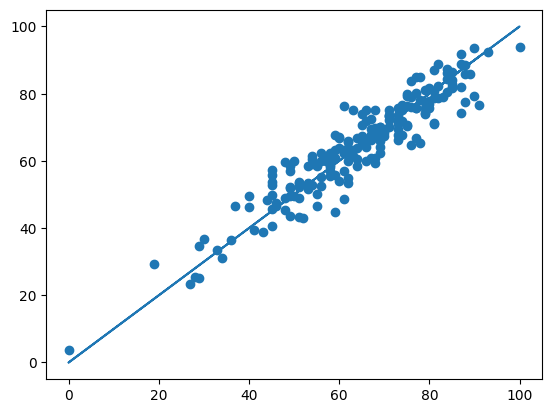

In [28]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test)
plt.show()


<Axes: xlabel='math_score'>

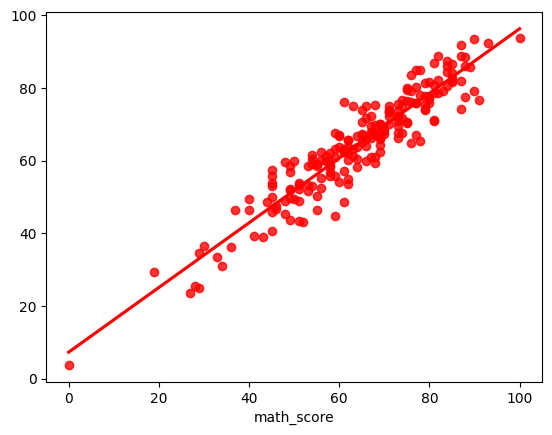

In [29]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')